**LSTM NEURAL NETWORKS FOR FUTURE DOLLAR PRICE FORECAST IN BRAZIL**

The aim of this study is to investigate the predictability of the direction of the Future Dollar price of contracts traded on B3 and to measure the financial gains from the use of the respective forecasts in trading strategies. The prediction method evaluated was the artificial neural network with short and long-term memory (LSTM), based on intraday data for the period from August 2020 to July 2021. The neural network model considered a set of input variables that influence the dynamics of the future dollar price. The forecast horizons tested were 30 seconds and 1 minute ahead. As a benchmark, the results of the LSTM network were compared with a set of classifiers traditionally considered in machine learning literature. The tested LSTM network was used to classify winning and losing trades in a pre-defined trading strategy. 



In [1]:
! pip install keras==2.6.0

     |████████████████████████████████| 1.3 MB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.6.0 which is incompatible.


In [2]:
! pip freeze


absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.0
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import clear_output
from requests import get
from shutil import copyfile
 
# import winsound
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dividirSequencia = 14.0


filenames = []


#Load the trades from file for training, predict and validate:

# Dataset with 30 seconds ahead trading results:
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2020-09e10-.csv') 
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2020-11-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2020-12-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-01-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-02-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-03-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-04-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-05-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-06-.csv')
filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(10PeriodosPFrente)/Inputs-2021-07-.csv')

# Dataset with 1 minute ahead trading results:
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2020-09e10-.csv') 
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2020-11-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2020-12-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-01-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-02-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-03-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-04-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-05-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-06-.csv')
# filenames.append( r'drive/MyDrive/PublishResearch/InputsCond-5-10(20PeriodoPFrente)/Inputs-2021-07-.csv')



 
inputsList = []
for filename in filenames:
  inputsList.append(  pd.read_csv(  filename, header=None, sep=';')   )
 
xtrain =  inputsList[0][inputsList[0].columns[1:701]].values.reshape(inputsList[0].shape[0],  50, int(dividirSequencia), order='F' )
ytrain =  inputsList[0][inputsList[0].columns[0]].values
 

xDatasets = []
yDatasets = []
for i in range(0,len(filenames)):
  print(i)
  xDatasets.append( inputsList[i][inputsList[i].columns[1:701]].values.reshape(inputsList[i].shape[0],  50, int(dividirSequencia), order='F' ) )
  yDatasets.append( inputsList[i][inputsList[i].columns[0]].values  )
 
trainIdxs = []
trainIdxs.append(0)

testIdxs = []
testIdxs.append(1)
testIdxs.append(2)
testIdxs.append(3)

# Validation indexes:
realtimeIdxs = []
realtimeIdxs.append(4)
realtimeIdxs.append(5)
realtimeIdxs.append(6)
realtimeIdxs.append(7)
realtimeIdxs.append(8)
realtimeIdxs.append(9)

 

0
1
2
3
4
5
6
7
8
9


In [6]:
import numpy as np
import time

import tensorflow as tf


from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda

from tensorflow.keras import layers, Model, callbacks


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras.optimizers import Nadam
import math
import matplotlib.pyplot as plt
import pandas as pd

from scipy.ndimage.interpolation import shift

import seaborn as sns


In [7]:




activations=['relu']

opt = Nadam(lr=0.00001, beta_1=0.09, beta_2=0.0999, epsilon=None, schedule_decay=0.0004)

history_dictionary = {}
verbose=2
predictions = {}

epcohPlotInterval = 15

binsList=[]
for i in range(-20,20):
  binsList.append(i*0.25)




from typing import Iterable 
#from collections import Iterable                            # < py38
def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:

class CustomCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, monitor='val_loss'):
      if epoch % epcohPlotInterval == 0:
        print(epoch/epcohPlotInterval)
        epochRelativa = int(epoch/epcohPlotInterval)



        histList0 = []
        histList = []
        for i in range(len(xDatasets)):
          pred = cand.predict(xDatasets[i])[:,0]
          # pred = pred - 3
          # pred = pred - 0.25
          act = yDatasets[i][:]
          if (sum( 1 for ix in range(0,len(pred)) if   pred[ix]  > 0  )) != 0:
            # If the prediction recommends to buy (pred>0) then it sum the observed price shift then divide all the sum by the quantity of trades:
            listHistoricoAbertoPtsTrade[i][epochRelativa] = (sum( act[ix] for ix in range(0,len(pred)) if   pred[ix] > 0 )  )  / (sum( 1 for ix in range(0,len(pred)) if   pred[ix]  > 0  ))
          else:
            listHistoricoAbertoPtsTrade[i][epochRelativa] = 0
          numBestEpoch[70+i] = (sum( 1 for ix in range(0,len(pred)) if   pred[ix]  > 0  ) )
          histList0.append([act[ix] for ix in range(0,len(pred)) if   True])
          histList.append([act[ix] for ix in range(0,len(pred)) if   pred[ix] > 0])

        listOfHistLists0.append(histList0)
        listOfHistLists.append(histList)


        for i in testIdxs:
          mda_Open_historyMSE_PtsTrade[epochRelativa] += -abs(cand.evaluate(xDatasets[i], yDatasets[i]))




        clear_output(wait=True)
        if len(predStr) > 0:
          # Print de predicted values for the last month, so 
          # it is possible to compare to the observed trades results in excel:
          print(predStr[0])


        print('Epoch: ', int(epoch) )
        print('BestEpoch: ' + str(numBestEpoch[0]))
        print('BestEpochMedia10Epochs: ' + str(numBestEpoch[1]))
        print('BestEpochMedia10Desvpad: ' + str(numBestEpoch[3]))

        print('PtsTrade: ' + str(numBestEpoch[4] ) )
        print('PtsTrade: ' + str(numBestEpoch[5] ) )
        print('PtsTrade: ' + str(numBestEpoch[6] ) )
        print('PtsTrade: ' + str(numBestEpoch[7] ) )
        print('PtsTrade: ' + str(numBestEpoch[8] ) )
        print('PtsTrade: ' + str(numBestEpoch[9] ) )
        print('QtdTrades: ' + str(numBestEpoch[14]) )
        print('QtdTrades: ' + str(numBestEpoch[15]) )
        print('QtdTrades: ' + str(numBestEpoch[16]) )
        print('QtdTrades: ' + str(numBestEpoch[17]) )
        print('QtdTrades: ' + str(numBestEpoch[18]) )
        print('QtdTrades: ' + str(numBestEpoch[19]) )

        print('BestEpochValResult: ' + str(numBestEpoch[2]))


        plt.rcParams['figure.figsize'] = (20,7)
        fig, (ax, ax2, ax3) = plt.subplots(nrows=3, ncols=1)


        ax.plot(pd.DataFrame(mda0)[0], color='silver', label='0.00PtsTrade')
        ax2.plot(pd.DataFrame(mda0)[0], color='silver', label='0.00PtsTrade')
        ax3.plot(pd.DataFrame(mda0)[0], color='silver', label='0.00PtsTrade')

        plotNow1 = 0
        for i in testIdxs:
          ax.plot(listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i], label=i)
          plotNow1 += listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i]

        ax.plot( plotNow1 / len(testIdxs), label='MediaValidacao', color='black')
        ax.tick_params(axis='both', colors='silver')
        ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax.set_xlim(-1, epochRelativa + 1.2)
        secY = ax3.twinx()


        criterioComparacao = 0

        for i in range(1,10):
          criterioComparacao += ( (listHistoricoAbertoPtsTrade[1][epochRelativa-i] -listAmostraPtsTrade[1]  + listHistoricoAbertoPtsTrade[2][epochRelativa-i] -listAmostraPtsTrade[2] + listHistoricoAbertoPtsTrade[3][epochRelativa-i] -listAmostraPtsTrade[3] )/3     )
        criterioComparacao = criterioComparacao*100


        desvpadCriterioComparacao = 0

        if epochRelativa > 15:
          desvpadCriterioComparacao +=  sum( 1 for i in range(0,10) if   (listHistoricoAbertoPtsTrade[1][epochRelativa-10:epochRelativa][i] - listHistoricoAbertoPtsTrade[1][epochRelativa-11:epochRelativa-1][i])  > 0  )
          desvpadCriterioComparacao +=  sum( 1 for i in range(0,10) if   (listHistoricoAbertoPtsTrade[2][epochRelativa-10:epochRelativa][i] - listHistoricoAbertoPtsTrade[2][epochRelativa-11:epochRelativa-1][i])  > 0  )
          desvpadCriterioComparacao +=  sum( 1 for i in range(0,10) if   (listHistoricoAbertoPtsTrade[3][epochRelativa-10:epochRelativa][i] - listHistoricoAbertoPtsTrade[3][epochRelativa-11:epochRelativa-1][i])  > 0  )
          for i in range(-10,10):
            mda_Open_historyMSE_Somado[epochRelativa] += mda_Open_historyMSE_PtsTrade[:-1][i]




        mda_Open_historyMedia10Epochs_PtsTrade[epochRelativa] = criterioComparacao
        mda_Open_historyDesvpad10Epochs_PtsTrade[epochRelativa] = desvpadCriterioComparacao




        secY.plot(pd.DataFrame(mda_Open_historyMedia10Epochs_PtsTrade[:-1] )[0], color='limegreen', label='testMSE')
        secY.plot(pd.DataFrame(mda_Open_historyDesvpad10Epochs_PtsTrade[:-1] * 10)[0], color='red', label='testMSE')

        plotNow2= 0
        for i in realtimeIdxs:
          ax2.plot(listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i], label=i)
          plotNow2 += listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i]

        ax2.plot( plotNow2 / len(realtimeIdxs), label='MediaValidacao', color='black')


        ax2.tick_params(axis='both', colors='silver')
        ax2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax2.set_xlim(-1, epochRelativa + 1.2)

        plt.axvline(x=numBestEpoch[0])
        ax2.axvline(x=numBestEpoch[0])


        for i in trainIdxs:
          ax3.plot(listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i], label=i)
          plotNow2 += listHistoricoAbertoPtsTrade[i] -listAmostraPtsTrade[i]


        ax3.tick_params(axis='both', colors='silver')
        ax3.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        ax3.set_xlim(-1, epochRelativa + 1.2)

        plt.axvline(x=numBestEpoch[0])
        ax3.axvline(x=numBestEpoch[0])
        ax.axvline(x=numBestEpoch[0])


        ax.set(ylim=(-2,2))
        ax2.set(ylim=(-2,2))

        plt.show()


        
        if epochRelativa > 10:
            if numBestEpoch[0] > 0:
              self.model.stop_training = True
            
            #The condition in the if below is the criteria for choosing the best epoch based on the financial result of the test set:
            if (listHistoricoAbertoPtsTrade[1][epochRelativa]-listAmostraPtsTrade[1] > 0 and listHistoricoAbertoPtsTrade[2][epochRelativa]-listAmostraPtsTrade[2] > 0 and listHistoricoAbertoPtsTrade[3][epochRelativa]-listAmostraPtsTrade[3] > 0 and
             criterioComparacao > numBestEpoch[1] and desvpadCriterioComparacao >= numBestEpoch[3] and desvpadCriterioComparacao != 0 ):
            
                timestr = time.strftime("%Y-%m-%d-%H-%M-%S")
                CurrentFilename = get('http://172.28.0.2:9000/api/sessions').json()[0]['name']

                pathLastSavedWheights = 'drive/MyDrive/PythonSave/' + CurrentFilename  + 'my_model_completo.h5'


                cand.save(pathLastSavedWheights)

                numBestEpoch[0] = float(epochRelativa)

                numBestEpoch[1] = criterioComparacao

                numBestEpoch[3] = desvpadCriterioComparacao

                # The results of the financial gains in the Validation set is stored on the variables below:
                numBestEpoch[4] = float(listHistoricoAbertoPtsTrade[4][epochRelativa]-listAmostraPtsTrade[4])
                numBestEpoch[5] = float(listHistoricoAbertoPtsTrade[5][epochRelativa]-listAmostraPtsTrade[5])
                numBestEpoch[6] = float(listHistoricoAbertoPtsTrade[6][epochRelativa]-listAmostraPtsTrade[6])
                numBestEpoch[7] = float(listHistoricoAbertoPtsTrade[7][epochRelativa]-listAmostraPtsTrade[7])
                numBestEpoch[8] = float(listHistoricoAbertoPtsTrade[8][epochRelativa]-listAmostraPtsTrade[8])
                numBestEpoch[9] = float(listHistoricoAbertoPtsTrade[9][epochRelativa]-listAmostraPtsTrade[9])

                numBestEpoch[14] = float(numBestEpoch[74])
                numBestEpoch[15] = float(numBestEpoch[75])
                numBestEpoch[16] = float(numBestEpoch[76])
                numBestEpoch[17] = float(numBestEpoch[77])
                numBestEpoch[18] = float(numBestEpoch[78])
                numBestEpoch[19] = float(numBestEpoch[79])

                numBestEpoch[2] =  float( float(numBestEpoch[4]*numBestEpoch[14]) +
                                          float(numBestEpoch[5]*numBestEpoch[15]) +
                                          float(numBestEpoch[6]*numBestEpoch[16]) +
                                          float(numBestEpoch[7]*numBestEpoch[17]) +
                                          float(numBestEpoch[8]*numBestEpoch[18]) +
                                          float(numBestEpoch[9]*numBestEpoch[19])  )
                numBestEpoch[2] =   numBestEpoch[2]/float(numBestEpoch[14]+numBestEpoch[15]+numBestEpoch[16]+numBestEpoch[17]+numBestEpoch[18]+numBestEpoch[19])
                
                predStr.append(str(pred))
                print('Treino1.3')
                


[[ 4.10261512e-01]
 [ 6.51906729e-02]
 [-9.04134214e-02]
 [-1.54873580e-01]
 [-1.33973062e-01]
 [ 4.30974364e-01]
 [-5.61780095e-01]
 [-2.60049731e-01]
 [-1.43093854e-01]
 [-8.38575721e-01]
 [-7.98098505e-01]
 [-8.40788126e-01]
 [-4.36676860e-01]
 [ 5.16763687e-01]
 [-1.45452261e-01]
 [ 1.95349634e-01]
 [ 5.21931171e-01]
 [ 3.25216234e-01]
 [ 3.69314373e-01]
 [ 3.17632407e-01]
 [-2.75656164e-01]
 [-3.43785644e-01]
 [ 1.40606612e-01]
 [ 4.03216541e-01]
 [ 4.39111590e-01]
 [ 6.14120007e-01]
 [ 3.83649647e-01]
 [ 8.15992951e-01]
 [ 6.47015452e-01]
 [ 4.61591244e-01]
 [ 3.30116034e-01]
 [ 2.29409873e-01]
 [ 8.56931210e-02]
 [-2.03218222e-01]
 [-2.17281044e-01]
 [-2.44659424e-01]
 [-2.02413112e-01]
 [-8.63835812e-02]
 [ 2.14075446e-02]
 [-5.79406977e-01]
 [-3.96275878e-01]
 [-9.50731397e-01]
 [-5.67903161e-01]
 [-8.64154935e-01]
 [-8.78808498e-01]
 [-5.67934692e-01]
 [-7.63328075e-01]
 [-8.17352593e-01]
 [-6.99838400e-01]
 [-5.73179364e-01]
 [-1.81790739e-01]
 [-9.10754502e-01]
 [-6.5758216

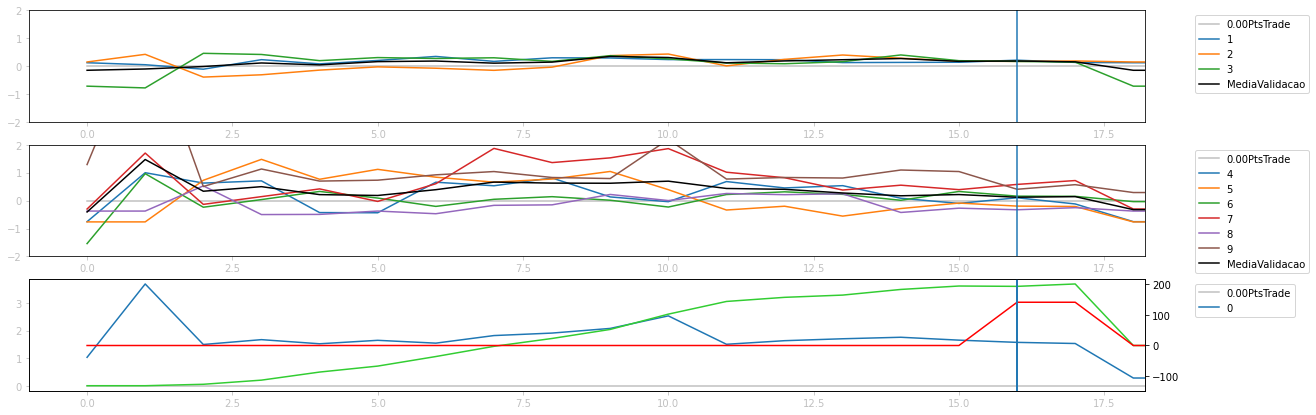

Treino1.3
%
time of execution =  177.17853474617004 seconds
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:

epochs = 10000


printDataFrame= pd.DataFrame()


predStr =[]

numBestEpoch = np.zeros((90,))
numBestEpoch[1] = -9999999999.0
numBestEpoch[3] = -9999999999.0


listOfHistLists0 = []
listOfHistLists = []

listHistoricoAbertoPtsTrade = []
for i in range(len(xDatasets)):
  listHistoricoAbertoPtsTrade.append(   np.zeros((int(epochs/epcohPlotInterval)+1,))  )

mda_Open_history = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history2 = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history3 = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history4 = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history5 = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history6 = np.zeros((int(epochs/epcohPlotInterval)+1,))

mda_Open_historyPtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history2PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history3PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history4PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history5PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))


mda_Open_historyMSE_PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_historyMSE_Somado = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_historyMedia10Epochs_PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_historyDesvpad10Epochs_PtsTrade = np.zeros((int(epochs/epcohPlotInterval)+1,))



mda_Open_historyFinanceiro = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history2Financeiro = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history3Financeiro = np.zeros((int(epochs/epcohPlotInterval)+1,))

mda_Open_historyTrade2pts = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history2Trade2pts = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history3Trade2pts = np.zeros((int(epochs/epcohPlotInterval)+1,))

mda_Open_historyTrade3pts = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history2Trade3pts = np.zeros((int(epochs/epcohPlotInterval)+1,))
mda_Open_history3Trade3pts = np.zeros((int(epochs/epcohPlotInterval)+1,))


amostra_history = np.zeros((1,))
amostra_history2 = np.zeros((1,))
amostra_history3 = np.zeros((1,))
amostra_history4 = np.zeros((1,))
amostra_history5 = np.zeros((1,))


amostra_historyPtsTrade = np.zeros((1,))
amostra_history2PtsTrade = np.zeros((1,))
amostra_history3PtsTrade = np.zeros((1,))
amostra_history4PtsTrade = np.zeros((1,))
amostra_history5PtsTrade = np.zeros((1,))

mda50 = mda_Open_history
mda50 = [ 0.5 if True else None for x in mda50]
mda0 = [ 0.0 if True else None for x in mda50]


listAmostraPtsTrade = []
for i in range(len(yDatasets)):
  print(i)
  act = yDatasets[i][:]
  if (sum( 1 for i in range(0,len(act)) if   True  ))  !=0:
    listAmostraPtsTrade.append(  (sum( act[i] for i in range(0,len(act)) if   True )  )  / (sum( 1 for i in range(0,len(act)) if   True  ))   )
  else:
    listAmostraPtsTrade.append(0)

print('LastEpoch: ')

start =  time.time()
cand = Sequential()

# LSTM neural network topology:
cand.add(layers.Bidirectional(LSTM(50, input_shape=(xtrain.shape[1], xtrain.shape[2]) , dropout=0.6,    return_sequences=True)))
cand.add(LSTM(50, input_shape=(xtrain.shape[1], xtrain.shape[2]) , dropout=0.6,    return_sequences=True))
cand.add(LSTM(50, input_shape=(xtrain.shape[1], xtrain.shape[2]) , dropout=0.6,    return_sequences=True))
cand.add(Dense(50))
cand.add(Dense(4,activation='relu'))
cand.add(Dense(1))

cand.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='nadam')#'Nadam'

# Training command line:
cand_history = cand.fit(xtrain, ytrain, epochs=epochs, callbacks=[CustomCallback()], validation_data=(xDatasets[testIdxs[0]], yDatasets[testIdxs[0]]), verbose=0, batch_size=50)

history_dictionary[activations[0]] = (cand_history, cand)
print('%')
end =  time.time()
print("time of execution = ", end-start, "seconds")

plt.show()



from shutil import copyfile
import time

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

colab_folder_prefix = ''

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    colab_folder_prefix = 'drive/MyDrive/PythonSave//'


timestr = time.strftime("%Y-%m-%d-%H-%M-%S")


if IN_COLAB:
    CurrentFilename = get('http://172.28.0.2:9000/api/sessions').json()[0]['name']
    copyfile('drive/MyDrive/Colab Notebooks/' + CurrentFilename, colab_folder_prefix + 'SavedExecutions/' + timestr + 'Script.ipynb')




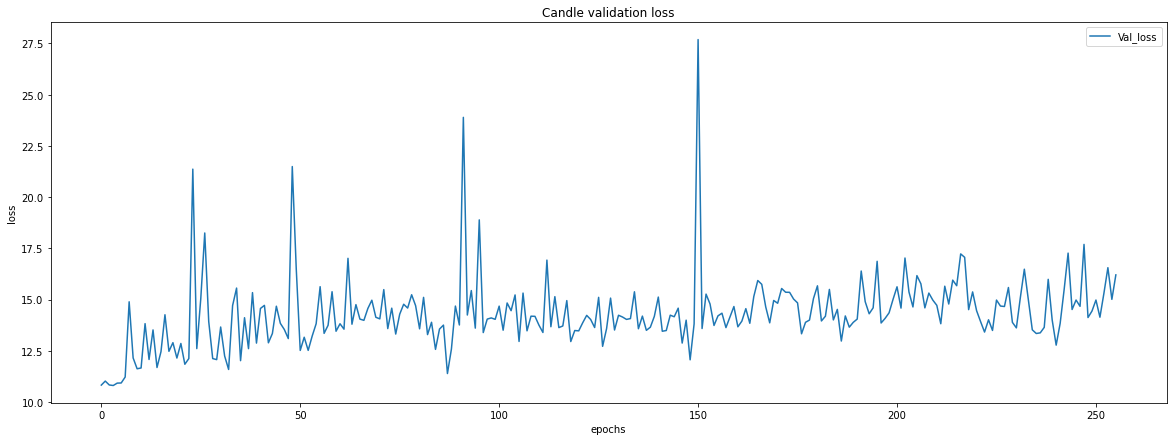

In [10]:
# Plot of the Mean Squared Error in each epoch:
plt.plot(cand_history.history['val_loss'], label='Val_loss')


plt.title('Candle validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')


plt.show()
